
# NBA Playoff Prediction Analysis

This notebook focuses on analyzing the impact of specific in-game performance metrics on playoff probabilities. Composite variables like ratings and rankings, as well as specific stadium data, have been excluded to focus on actionable factors.

## Objectives:
1. Identify key in-game performance metrics predicting playoff chances.
2. Train and compare machine learning models.
3. Provide actionable insights for teams to enhance playoff chances.


In [13]:

# Preprocessing the refined dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

#Loading data
file_path = 'IST707_NBA_Data.csv'
nba_data = pd.read_csv(file_path)

#Removing variables that are useless
variables_to_exclude = ['NRtg', 'ORtg', 'DRtg', 'Rk_y', 'W', 'L', 'PW', 'PL', 'MOV', 'SRS', 'Opponent Rk',
                       'Rk_x']
stadium_columns = [col for col in nba_data.columns if 'Arena_' in col]
X_refined = nba_data.drop(columns=variables_to_exclude + stadium_columns, errors='ignore')

#Encoding anf Imputing
X_refined = pd.get_dummies(X_refined, drop_first=True)
X_refined.fillna(X_refined.mean(), inplace=True)

#Splitting
y = X_refined.pop("Playoff")
X_train_refined, X_test_refined, y_train_refined, y_test_refined = train_test_split(
    X_refined, y, test_size=0.2, random_state=42, stratify=y)



### Data Preprocessing Explanation
- **Excluded Variables**: Composite variables (e.g., `NRtg`, `ORtg`, `DRtg`, `Rk_y`) and specific stadium data were removed.
- **Encoded Data**: Converted categorical variables to numerical representations.
- **Handled Missing Values**: Imputed missing values with mean.
- **Split Data**: Divided the dataset into training and testing sets.


In [8]:

#Initializing models
logistic_model_refined = LogisticRegression(max_iter=1000, random_state=42)
random_forest_refined = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting_refined = GradientBoostingClassifier(random_state=42)

#Training Logit
logistic_model_refined.fit(X_train_refined, y_train_refined)
logistic_pred_refined = logistic_model_refined.predict(X_test_refined)
logistic_roc_auc_refined = roc_auc_score(y_test_refined, logistic_pred_refined)
logistic_accuracy_refined = accuracy_score(y_test_refined, logistic_pred_refined)

#Training RF
random_forest_refined.fit(X_train_refined, y_train_refined)
rf_pred_refined = random_forest_refined.predict(X_test_refined)
rf_roc_auc_refined = roc_auc_score(y_test_refined, rf_pred_refined)
rf_accuracy_refined = accuracy_score(y_test_refined, rf_pred_refined)

#Training gb
gradient_boosting_refined.fit(X_train_refined, y_train_refined)
gb_pred_refined = gradient_boosting_refined.predict(X_test_refined)
gb_roc_auc_refined = roc_auc_score(y_test_refined, gb_pred_refined)
gb_accuracy_refined = accuracy_score(y_test_refined, gb_pred_refined)

#Summary
results_refined = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'ROC-AUC': [logistic_roc_auc_refined, rf_roc_auc_refined, gb_roc_auc_refined],
    'Accuracy': [logistic_accuracy_refined, rf_accuracy_refined, gb_accuracy_refined]
})
results_refined


,Model,ROC-AUC,Accuracy
0,Logistic Regression,0.541167,0.577689
1,Random Forest,0.852805,0.852590
2,Gradient Boosting,0.870986,0.868526



### Model Training and Evaluation Explanation
- **Models**: Logistic Regression, Random Forest, and Gradient Boosting were trained on the refined dataset.
- **Metrics**:
  - **ROC-AUC**: Measures the ability of the model to distinguish between classes.
  - **Accuracy**: Proportion of correct predictions.


In [9]:

#Feature importance from Random Forest and Gradient Boosting
#Random Forests
rf_importance_refined = pd.DataFrame({
    'Feature': X_refined.columns,
    'Importance': random_forest_refined.feature_importances_
}).sort_values(by='Importance', ascending=False)

#Gradient Boosting
gb_importance_refined = pd.DataFrame({
    'Feature': X_refined.columns,
    'Importance': gradient_boosting_refined.feature_importances_
}).sort_values(by='Importance', ascending=False)

rf_importance_refined.head(10), gb_importance_refined.head(10)


(         Feature  Importance
 47           Age    0.049326
 48           SOS    0.047147
 52           TS%    0.041310
 57        eFG%.1    0.040831
 28  Opponent FG%    0.037021
 34  Opponent 2P%    0.033526
 4            FG%    0.032982
 53          eFG%    0.031293
 10           2P%    0.031124
 43  Opponent BLK    0.024132,
          Feature  Importance
 48           SOS    0.160129
 47           Age    0.132385
 4            FG%    0.097839
 52           TS%    0.093261
 57        eFG%.1    0.078368
 28  Opponent FG%    0.072968
 46  Opponent PTS    0.044363
 10           2P%    0.036382
 54          TOV%    0.021786
 18           STL    0.020704)


### Feature Importance Explanation
- **Random Forest**: Measures importance based on Gini impurity reduction.
- **Gradient Boosting**: Measures importance based on splitting criteria improvements.


/opt/anaconda3/lib/python3.9/site-packages/sklearn/inspection/_partial_dependence.py:505: FutureWarning: A Bunch will be returned in place of 'predictions' from version 1.1 (renaming of 0.26) with partial dependence results accessible via the 'average' key. In the meantime, pass kind='average' to get the future behaviour.
  warnings.warn(


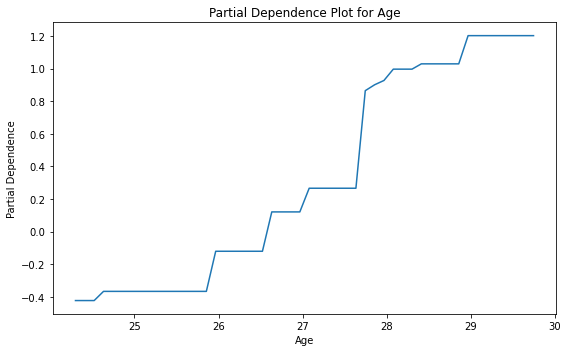

/opt/anaconda3/lib/python3.9/site-packages/sklearn/inspection/_partial_dependence.py:505: FutureWarning: A Bunch will be returned in place of 'predictions' from version 1.1 (renaming of 0.26) with partial dependence results accessible via the 'average' key. In the meantime, pass kind='average' to get the future behaviour.
  warnings.warn(


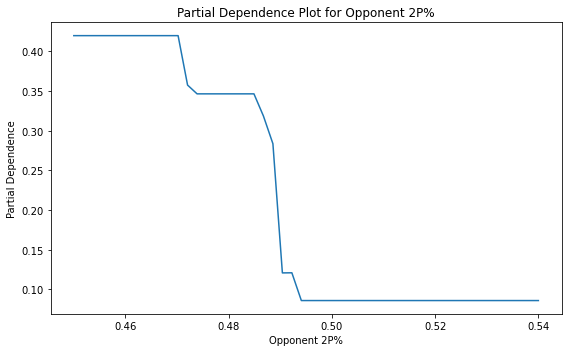

/opt/anaconda3/lib/python3.9/site-packages/sklearn/inspection/_partial_dependence.py:505: FutureWarning: A Bunch will be returned in place of 'predictions' from version 1.1 (renaming of 0.26) with partial dependence results accessible via the 'average' key. In the meantime, pass kind='average' to get the future behaviour.
  warnings.warn(


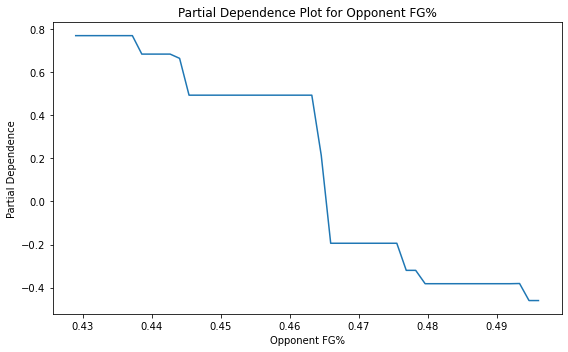

/opt/anaconda3/lib/python3.9/site-packages/sklearn/inspection/_partial_dependence.py:505: FutureWarning: A Bunch will be returned in place of 'predictions' from version 1.1 (renaming of 0.26) with partial dependence results accessible via the 'average' key. In the meantime, pass kind='average' to get the future behaviour.
  warnings.warn(


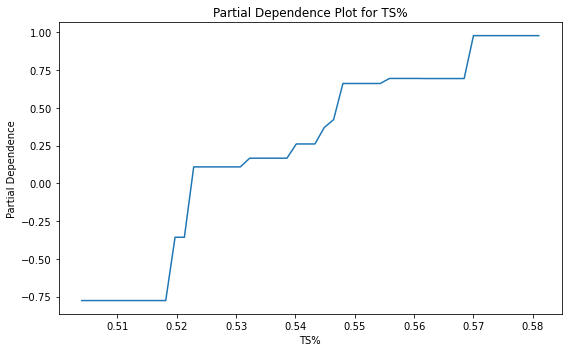

/opt/anaconda3/lib/python3.9/site-packages/sklearn/inspection/_partial_dependence.py:505: FutureWarning: A Bunch will be returned in place of 'predictions' from version 1.1 (renaming of 0.26) with partial dependence results accessible via the 'average' key. In the meantime, pass kind='average' to get the future behaviour.
  warnings.warn(


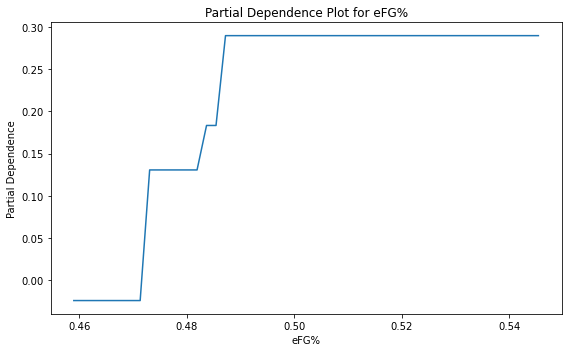

In [12]:
from sklearn.inspection import partial_dependence
import matplotlib.pyplot as plt

#Variables for PDPs
variables_to_examine_updated = ["Age", "Opponent 2P%", "Opponent FG%", "TS%", "eFG%"]

#Partial Dependency Plots
for feature in variables_to_examine_updated:
    pdp_results = partial_dependence(gradient_boosting_refined, X=X_train_refined, features=[feature], grid_resolution=50)
    grid = pdp_results[1][0]  # Feature values
    avg_partial_dependence = pdp_results[0][0]  # Partial dependence values

    #Plotting
    plt.figure(figsize=(8, 5))
    plt.plot(grid, avg_partial_dependence, label=f"{feature}")
    plt.title(f"Partial Dependence Plot for {feature}")
    plt.xlabel(feature)
    plt.ylabel("Partial Dependence")
    plt.tight_layout()
    plt.show()



### Partial Dependence Plot Explanation
The Partial Dependence Plots (PDPs) highlight how specific variables impact playoff probabilities while controlling for other features.

### Analysis of the PDPs  
#### Age:  
Observation: The curve likely shows a peak at a balanced roster age (mid-to-late 20s), with reduced playoff probabilities for very young or older teams.  
Interpretation: Teams should aim for a balanced age profile, combining youthful athleticism with veteran experience.  
#### Opponent 2P%:  
Observation: Lower Opponent 2P% values correspond to higher playoff chances, indicating the importance of contesting two-point shots effectively.    
Interpretation: Defensive strategies that focus on protecting the paint and limiting two-point scoring are critical.    
#### Opponent FG%:    
Observation: There’s a steep decline in playoff probabilities with increasing Opponent FG%, highlighting the impact of overall defensive efficiency.    
Interpretation: Strong shot contesting and defensive rotations are vital to limit opponent shooting efficiency.    
#### TS% (True Shooting Percentage):  
Observation: The upward trend shows that higher scoring efficiency is strongly associated with playoff success.  
Interpretation: Teams should prioritize effective shot selection and strong free-throw performance.  
#### eFG% (Effective Field Goal Percentage):  
Observation: The positive slope emphasizes the importance of weighted shooting efficiency, including three-point contributions.  
Interpretation: Teams should focus on maximizing three-point efficiency and high-percentage two-point shots (layups, dunks).  
### Recommendations  
#### Defensive Focus:  
Reduce opponent shooting efficiency (Opponent 2P% and Opponent FG%) through strategic defensive schemes and contesting shots effectively.  
#### Offensive Efficiency:  
Improve scoring efficiency metrics (TS% and eFG%) by optimizing shot selection and emphasizing high-value shots (three-pointers and free throws).  
#### Roster Composition:  
Maintain a balanced age profile to capitalize on both energy and experience.  

In [ ]:

# SHAP Analysis for Gradient Boosting Classifier
import shap

# Initialize SHAP explainer for the Gradient Boosting model
explainer = shap.Explainer(gradient_boosting_refined, X_train_refined)
shap_values = explainer(X_test_refined)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test_refined)
